In [3]:
# 机器学习算法的随机数据生成
# https://www.cnblogs.com/pinard/p/6047802.html

## numpy 随机数据生成

#1) rand(d0, d1, ..., dn) 用来生成d0xd1x...dn维的数组。数组的值在[0,1)之间
import numpy as np
np.random.rand(3, 2, 2) 

array([[[0.47239342, 0.51372672],
        [0.62021943, 0.3251597 ]],

       [[0.49370258, 0.36672726],
        [0.0595245 , 0.24946367]],

       [[0.52749116, 0.29447602],
        [0.24477675, 0.11776263]]])

In [5]:
# 2) randn((d0, d1, ..., dn), 也是用来生成d0xd1x...dn维的数组。不过数组的值服从N(0,1)的标准正态分布
np.random.randn(3,2)

array([[ 0.35598797,  0.76240582],
       [ 1.5476884 , -1.18220492],
       [ 2.64194532, -0.60195462]])

In [7]:
#果需要服从N(μ,σ2)的正态分布，只需要在randn上每个生成的值x上做变换σx+μ即可，例如：
2*np.random.randn(3,2)+1    #输出如下3x2的数组，这些值是N(1,4)的抽样数据

array([[-1.62418453, -2.78797268],
       [-1.24039257,  2.24933736],
       [-1.53179461, -0.48027027]])

In [10]:
# 3) randint(low[, high, size])，生成随机的大小为size的数据，size可以为整数，为矩阵维数，或者张量的维数。值位于半开区间 [low, high)。
np.random.randint(3, size=[2, 3, 4])        #返回维数为2x3x4的数据。取值范围为最大值为3的整数。

array([[[0, 2, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 0, 1]],

       [[1, 0, 0, 1],
        [0, 1, 1, 2],
        [1, 0, 1, 1]]])

In [11]:
np.random.randint(3, 6, size=[2, 3])        #返回维数为2x3的数据。取值范围为[3,6).

array([[5, 5, 4],
       [5, 5, 5]])

In [12]:
# 4) random_integers(low[, high, size]),和上面的randint类似，区别在与取值范围是闭区间[low, high]。
np.random.random_integers(3, 5, size=[2,3])

/tmp/ipykernel_11620/344320786.py:2: DeprecationWarning: This function is deprecated. Please call randint(3, 5 + 1) instead
  np.random.random_integers(3, 5, size=[2,3])


array([[3, 3, 3],
       [5, 3, 3]])

In [13]:
# 5) random_sample([size]), 返回随机的浮点数，在半开区间 [0.0, 1.0)。如果是其他区间[a,b),可以加以转换(b - a) * random_sample([size]) + a
(5-2)*np.random.random_sample(3)+2      #返回[2,5)之间的3个随机数

array([2.39083434, 2.36251859, 3.30345044])

In [14]:
## scikit-learn随机数据生成API介绍
# scikit-learn生成随机数据的API都在datasets类之中，和numpy比起来，可以用来生成适合特定机器学习模型的数据。常用的API有：
# 　1) 用make_regression 生成回归模型的数据
# 　2) 用make_hastie_10_2，make_classification或者make_multilabel_classification生成分类模型数据
# 　3) 用make_blobs生成聚类模型数据
# 　4) 用make_gaussian_quantiles生成分组多维正态分布的数据


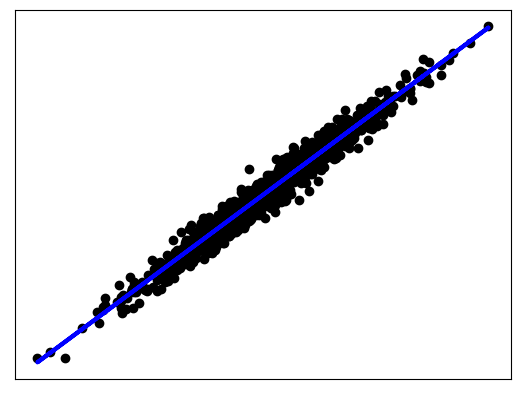

In [33]:
## scikit-learn随机数据生成
## 回归模型随机数据
# 这里我们使用make_regression生成回归模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数），noise（样本随机噪音）和coef（是否返回回归系数）。
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets._samples_generator import make_regression
# X为样本特征，y为样本输出， coef为回归系数，共1000个样本，每个样本1个特征
X, y, coef = make_regression(n_samples=1000, n_features=1, noise=10, coef=True)
#画图
plt.scatter(X, y, color='black')
plt.plot(X, X*coef, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

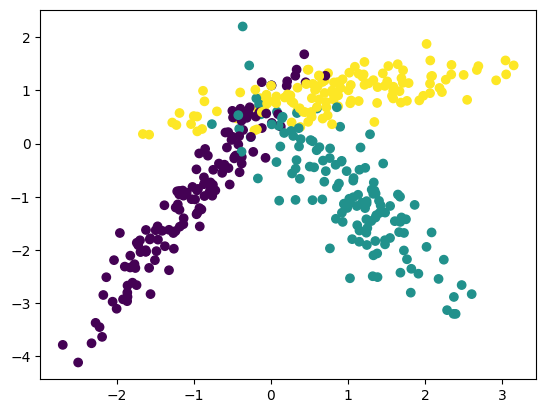

In [27]:
# 分类模型随机数据
# 这里我们用make_classification生成三元分类模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数）， n_redundant（冗余特征数）和n_classes（输出的类别数）
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets._samples_generator import make_classification
# X1为样本特征，Y1为样本类别输出， 共400个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X1, Y1 = make_classification(n_samples=400, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.show()

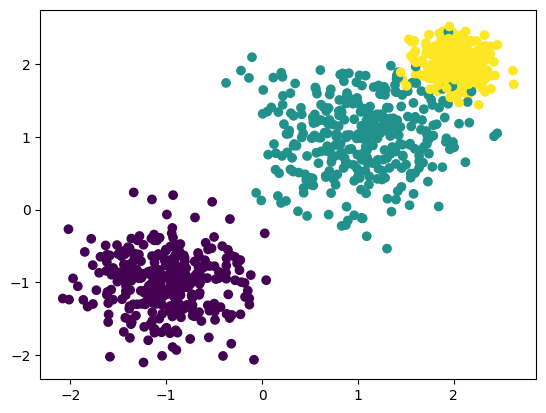

In [34]:
# 聚类模型随机数据
# 用make_blobs生成聚类模型数据。几个关键参数有n_samples（生成样本数）， n_features（样本特征数），centers(簇中心的个数或者自定义的簇中心)和cluster_std（簇数据方差，代表簇的聚合程度）

import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets._samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共3个簇，簇中心在[-1,-1], [1,1], [2,2]， 簇方差分别为[0.4, 0.5, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [1, 1], [2, 2]], cluster_std=[0.4, 0.5, 0.2])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

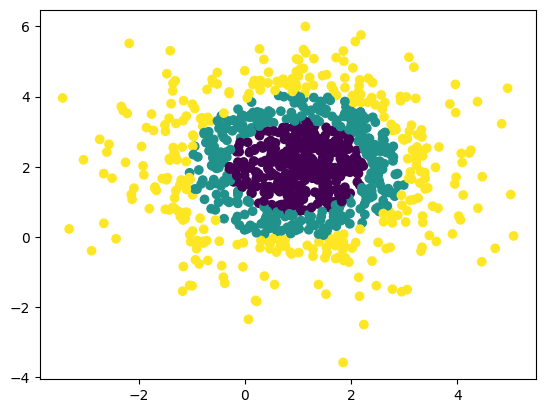

In [35]:
#  分组正态分布混合数据
# 我们用make_gaussian_quantiles生成分组多维正态分布的数据。几个关键参数有n_samples（生成样本数）， n_features（正态分布的维数），mean（特征均值）， cov（样本协方差的系数）， n_classes（数据在正态分布中按分位数分配的组数）
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_gaussian_quantiles
# 生成2维正态分布，生成的数据按分位数分成3组，1000个样本,2个样本特征均值为1和2，协方差系数为2
X1, Y1 = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3, mean=[1, 2], cov=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)